In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Question 1:

Open the NHANES (or Ames prices or college completion datasets, if you prefer)

Find two categorical variables of interest (there are 198, and short descriptions are given in the nhanes_meta_17_18.csv file). 

Investigate their missing values (you don't have to focus on missing values for this analysis like we did with police use of force, but always be aware of how dirty the data are)

Compute a contingency table for your categorical 
 and 

Discuss any interesting patterns (or lack of one) that you observe

In [6]:
nhahes=pd.read_csv("nhanes_data_17_18.csv")

/var/folders/09/89r30_ms6xdcd7znk61plqgr0000gn/T/ipykernel_14955/1080473744.py:1: DtypeWarning: Columns (142) have mixed types. Specify dtype option on import or set low_memory=False.
  nhahes=pd.read_csv("nhanes_data_17_18.csv")


In [7]:
nhahes.head()

,SEQN,GeneralHealthCondition,EverBreastfedOrFedBreastmilk,AgeStoppedBreastfeedingdays,AgeFirstFedFormuladays,AgeStoppedReceivingFormuladays,AgeStartedOtherFoodbeverage,AgeFirstFedMilkdays,TypeOfMilkFirstFedWholeMilk,TypeOfMilkFirstFed2Milk,...,DaysSmokedCigsDuringPast30Days,AvgCigarettesdayDuringPast30Days,TriedToQuitSmoking,TimesStoppedSmokingCigarettes,HowLongWereYouAbleToStopSmoking,UnitOfMeasureDayweekmonthyear_2_SMQ,CurrentSelfreportedHeightInches,CurrentSelfreportedWeightPounds,TriedToLoseWeightInPastYear,TimesLost10LbsOrMoreToLoseWeight
0,93703.0,NaN,1.0,273.0,1.0,365.0,152.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,NaN,1.0,60.0,3.0,365.0,126.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,63.0,165.0,0.0,11 times or more
3,93706.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,145.0,0.0,Never
4,93707.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
nhahes.dtypes

SEQN                                   float64
GeneralHealthCondition                  object
EverBreastfedOrFedBreastmilk           float64
AgeStoppedBreastfeedingdays            float64
AgeFirstFedFormuladays                 float64
                                        ...   
UnitOfMeasureDayweekmonthyear_2_SMQ     object
CurrentSelfreportedHeightInches        float64
CurrentSelfreportedWeightPounds        float64
TriedToLoseWeightInPastYear            float64
TimesLost10LbsOrMoreToLoseWeight        object
Length: 198, dtype: object

In [9]:
 nhahes['GeneralHealthCondition'].isna().sum()

np.int64(2402)

In [10]:
nhahes["GeneralHealthCondition"]

0             NaN
1             NaN
2            Good
3       Very good
4            Good
          ...    
8361    Very good
8362      Fair or
8363         Good
8364    Very good
8365         Good
Name: GeneralHealthCondition, Length: 8366, dtype: object

In [11]:
nhahes["EverBreastfedOrFedBreastmilk"]

0       1.0
1       1.0
2       NaN
3       NaN
4       NaN
       ... 
8361    NaN
8362    NaN
8363    NaN
8364    NaN
8365    NaN
Name: EverBreastfedOrFedBreastmilk, Length: 8366, dtype: float64

In [12]:
nhahes["TimesLost10LbsOrMoreToLoseWeight"].isna().sum()

np.int64(2572)

In [13]:
nhahes["CoveredByHealthInsurance"].isna().sum()

np.int64(20)

In [14]:
nhahes.isna().sum()

SEQN                                      0
GeneralHealthCondition                 2402
EverBreastfedOrFedBreastmilk           7297
AgeStoppedBreastfeedingdays            7504
AgeFirstFedFormuladays                 7289
                                       ... 
UnitOfMeasureDayweekmonthyear_2_SMQ    7870
CurrentSelfreportedHeightInches        2590
CurrentSelfreportedWeightPounds        2538
TriedToLoseWeightInPastYear            3279
TimesLost10LbsOrMoreToLoseWeight       2572
Length: 198, dtype: int64

In [15]:
nhahes["GeneralHealthCondition"].value_counts()

GeneralHealthCondition
Good         2454
Very good    1544
Fair or      1175
Excellent     619
Poor?         172
Name: count, dtype: int64

Contingency Table and Interpretation

Based on the contingency table, patients that are covered by health insurance are far more likely to have excellent and good health compared to patients that aren't covered by health insurance. In fact, amongst patients with health insurance, those with excellent and with very good health make up 10.8% and 27.3&=%, respectively, of patients with health insurance. This is different from patients without health insurance. Within this group, only 17% have very good health and less than 8% have excellent health.

In [16]:
    contingency_table = pd.crosstab(nhahes['GeneralHealthCondition'], nhahes['CoveredByHealthInsurance'], margins=True)
    print(contingency_table)

CoveredByHealthInsurance  0.0   1.0   All
GeneralHealthCondition                   
Excellent                  66   551   617
Fair or                   210   959  1169
Good                      377  2071  2448
Poor?                      34   138   172
Very good                 144  1398  1542
All                       831  5117  5948


In [17]:

pd.crosstab(nhahes['GeneralHealthCondition'], nhahes['CoveredByHealthInsurance'], normalize='columns')

CoveredByHealthInsurance,0.0,1.0
GeneralHealthCondition,,
Excellent,0.079422,0.107680
Fair or,0.252708,0.187415
Good,0.453670,0.404729
Poor?,0.040915,0.026969
Very good,0.173285,0.273207


Question 2

First, I started out by examining different variables and their number of missing values. I decided to use General Health Condition as the categorical variable and Minutes Sedentary Activity as numerical variable because each variable has a "similar" amount of missing values

In [21]:
nhahes['RatioOfFamilyIncomeToPoverty'].isna().sum()

np.int64(1034)

In [22]:
nhahes['GeneralHealthCondition'].isna().sum()

np.int64(2402)

In [23]:
nhahes['MinutesSedentaryActivity'].isna().sum()

np.int64(2843)

In [24]:
nhahes['HowHealthyIsTheDiet'].isna().sum()

np.int64(2540)

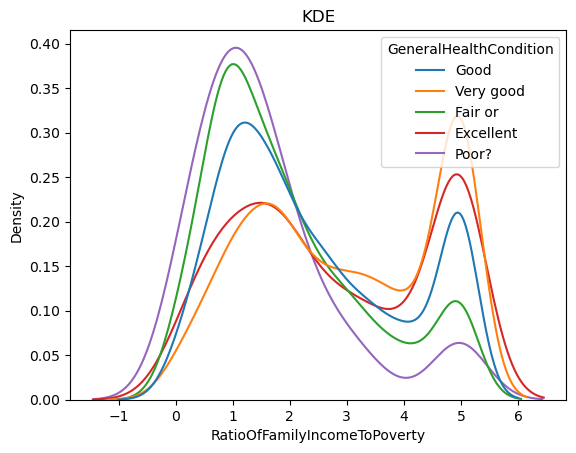

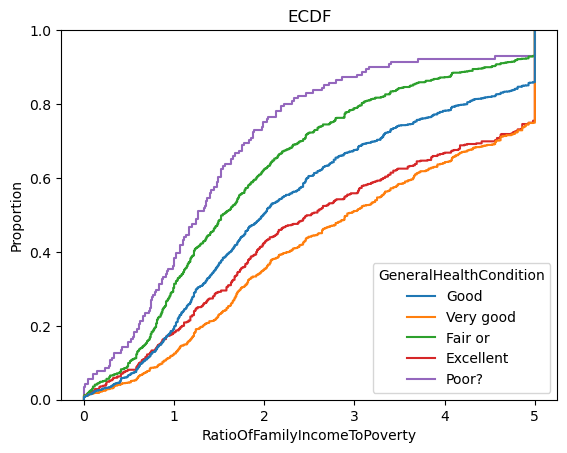

MinutesSedentaryActivity                           \
                                          count        mean          std   
GeneralHealthCondition                                                     
Excellent                                 456.0  326.969298   176.710240   
Fair or                                  1106.0  454.869801  1138.495462   
Good                                     2148.0  363.277933   587.912432   
Poor?                                     167.0  445.922156   780.318996   
Very good                                1248.0  385.667468   693.031169   

                                                                   
                                 min    25%    50%    75%     max  
GeneralHealthCondition                                             
Excellent               1.100000e+01  180.0  300.0  480.0   960.0  
Fair or                 5.000000e+00  180.0  300.0  480.0  9999.0  
Good                    5.397605e-79  180.0  300.0  480.0  9999.0  
Poor?                   1.500000e+01  240.0  360.0  480.0  9999.0  
Very good               1.000000e+00  180.0  300.0  480.0  9999.0

In [30]:
conditioner = 'GeneralHealthCondition'
sns.kdeplot( data=nhahes, x='RatioOfFamilyIncomeToPoverty', hue=conditioner, common_norm=False ).set(title='KDE')
plt.show()
sns.ecdfplot( data=nhahes, x='RatioOfFamilyIncomeToPoverty', hue=conditioner).set(title='ECDF')
plt.show()
nhahes.loc[:,['MinutesSedentaryActivity', conditioner]].groupby(conditioner).describe()